Objectives:-
1. loading necessary libraries
2. reading  the data
3. Exploring Data and initial analysis 
4. Feature Extraction
5. Data Type Conversion
6. Checking Null counts
7. checking outliers
8. Data Preparation - Preprocessing pipeline
9. Target value distribution.
10. Visualisations
11. Dividing data into training and validation subsets
12. model building using linear and non linear, and nonparametric model(KNN)
13. Test data preparation submission
14. Finding important Features
15. Model insights using ROC AUC curve
16. Recomendations to the client 

In [1]:
#importing necessary libraries
import os
import numpy as np
import pandas as pd

#preprocessing libraries
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

#model building libraries
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

#metric libraries
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, make_scorer 
#visualisations libraries
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


In [2]:
# to find the current working directory
os.getcwd()

'C:\\Users\\shashidhar\\Mith_sept12_shashidhar'

# Reading the Data

In [3]:
train = pd.read_csv('C:\\Users\\shashidhar\\Mith_sept12_shashidhar\\train_data-1599717478076.csv',na_values=[" ","na","NA"])

test = pd.read_csv('C:\\Users\\shashidhar\\Mith_sept12_shashidhar\\test_data-1599717650029.csv',na_values=[" ","na","NA"])

print(train.shape)
print(test.shape)

train.head()

(76529, 11)
(19133, 10)


,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.000,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.000,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.000,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.000,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.000,2016-11-16 17:04:42+00:00,2,0


In [4]:
test.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.000,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.000,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.000,2017-01-21 10:18:11+00:00,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.000,2017-01-16 13:25:10+00:00,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.000,2017-02-09 12:47:28+00:00,2


# Exploring Data and initial analysis

In [5]:
# to know the distribution of numerical columns
train.describe(include='all')

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
count,76529.000,76529.000,76529,76529.000,76529,76529,76529,76529.000,76529,76529.000,76529.000
unique,nan,nan,6,nan,9,1,4,nan,75811,nan,nan
top,nan,nan,sbi_atm_cum_debit_card,nan,cat_1,IND_INR,other_pcs,nan,2016-12-24 16:30:13+00:00,nan,nan
freq,nan,nan,30538,nan,36306,76529,45560,nan,12,nan,nan
mean,694019979612230.750,12474830.142,NaN,58497.189,NaN,NaN,NaN,132.724,NaN,2.256,0.002
std,786788520201862.000,12058784.190,NaN,36740.217,NaN,NaN,NaN,2350.111,NaN,0.732,0.045
min,8.000,1.000,NaN,7889.000,NaN,NaN,NaN,-20000.000,NaN,0.000,0.000
25%,43878656207511.000,3515625.000,NaN,23667.000,NaN,NaN,NaN,-1.000,NaN,2.000,0.000
50%,345254019471577.000,9753129.000,NaN,47334.000,NaN,NaN,NaN,20.000,NaN,2.000,0.000
75%,1173440179290176.000,17884441.000,NaN,78890.000,NaN,NaN,NaN,52.000,NaN,2.000,0.000


In [6]:
#let us see the dimensions of train and test 
print("train dimensions:", train.shape)
print("test dimensions:", test.shape)

train dimensions: (76529, 11)
test dimensions: (19133, 10)


In [7]:
#let us see data types present in train
train.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [8]:
#let us see unique levels in train
train.nunique()

transaction_number          76529
user_id                      3594
payment_method                  6
partner_id                     23
partner_category                9
country                         1
device_type                     4
money_transacted             1454
transaction_initiation      75811
partner_pricing_category        4
is_fraud                        2
dtype: int64

In [9]:
#let us unique levels in test
test.nunique()

transaction_number          19133
user_id                      2617
payment_method                  6
partner_id                     20
partner_category                8
country                         1
device_type                     4
money_transacted              695
transaction_initiation      19090
partner_pricing_category        4
dtype: int64

In [10]:
#save transaction number
transaction_number_train = train['transaction_number']
transaction_number_test = test['transaction_number']
#save user id
user_id_train = train["user_id"]
user_id_test = test["user_id"]
#country column has only one level so we drop it without saving

In [11]:
#we can remove unnecessary columns 
train.drop(['transaction_number','country'],axis =1,inplace=True)
test.drop(['transaction_number','country'],axis =1,inplace=True)

# Feature Extraction

In [12]:
#Date=pd.to_datetime(train['transaction_initiation']).dt.date
#pd.DatetimeIndex(Date).year
#print(type(Date))

In [13]:
#<class 'pandas.core.indexes.numeric.Int64Index'>

In [14]:
#Feature extraction
Date=pd.to_datetime(train['transaction_initiation']).dt.date
#train['Time']=pd.to_datetime(train['transaction_initiation']).dt.time
train['year'] = pd.DatetimeIndex(Date).year
train['month'] = pd.DatetimeIndex(Date).month
train['day'] = pd.DatetimeIndex(Date).day
train['hour']=pd.to_datetime(train['transaction_initiation']).dt.hour
#changing them to category type
#train['Date']= train['Date'].astype('category')
train['month']= train['month'].astype('category')
#train['Time']= train['Time'].astype('category')
train['year']= train['year'].astype('category')
train['day']= train['day'].astype('category')


In [15]:
#Feature extraction
test_Date=pd.to_datetime(test['transaction_initiation']).dt.date
#train['Time']=pd.to_datetime(train['transaction_initiation']).dt.time
test['year'] = pd.DatetimeIndex(test_Date).year
test['month'] = pd.DatetimeIndex(test_Date).month
test['day'] = pd.DatetimeIndex(test_Date).day
test['hour']=pd.to_datetime(test['transaction_initiation']).dt.hour
#changing them to category type
#train['Date']= train['Date'].astype('category')
test['month']= test['month'].astype('category')
test['year']= test['year'].astype('category')
test['day']= test['day'].astype('category')


In [16]:
train['timebins'] = pd.cut(train['hour'], 
                    bins=[0,6,12,18,24], 
                    include_lowest=True, 
                    labels=['0-6hrs','6-12hrs','12-18hrs','18-24hrs'])

In [17]:
train.timebins

0        18-24hrs
1         6-12hrs
2         6-12hrs
3        12-18hrs
4        12-18hrs
           ...   
76524    12-18hrs
76525     6-12hrs
76526    18-24hrs
76527    12-18hrs
76528    18-24hrs
Name: timebins, Length: 76529, dtype: category
Categories (4, object): ['0-6hrs' < '6-12hrs' < '12-18hrs' < '18-24hrs']

In [18]:
test['timebins'] = pd.cut(test['hour'], 
                    bins=[0,6,12,18,24], 
                    include_lowest=True, 
                    labels=['0-6hrs','6-12hrs','12-18hrs','18-24hrs'])
test.timebins

0        12-18hrs
1        12-18hrs
2         6-12hrs
3        12-18hrs
4         6-12hrs
           ...   
19128    12-18hrs
19129    18-24hrs
19130      0-6hrs
19131    12-18hrs
19132    18-24hrs
Name: timebins, Length: 19133, dtype: category
Categories (4, object): ['0-6hrs' < '6-12hrs' < '12-18hrs' < '18-24hrs']

In [19]:
#train['timebins']= train['timebins'].astype('category')

In [20]:
#  rng = pd.date_range('2017-04-03', periods=30, freq='H').strftime('%H:%M:%S')
#  df = pd.DataFrame({'Time': rng}) 

# hours = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# df['cats'] = pd.cut(hours, 
#                     bins=[0,6,12,18,24], 
#                     include_lowest=True, 
#                     labels=['cat1','cat2','cat3','cat4'])

In [21]:
train.drop(['transaction_initiation','hour'],axis=1,inplace=True)
test.drop(['transaction_initiation','hour'],axis=1,inplace=True)


In [22]:
train.head

<bound method NDFrame.head of         user_id           payment_method  partner_id partner_category  \
0      17539344   sbi_atm_cum_debit_card       47334            cat_1   
1      24710841        e_wallet_payments       78890            cat_2   
2      24265476        e_wallet_payments       78890            cat_2   
3      10240000        other_debit_cards      102557            cat_3   
4       5880625        other_debit_cards      118335            cat_1   
...         ...                      ...         ...              ...   
76524  19686969   sbi_atm_cum_debit_card       47334            cat_1   
76525  11662225  visa_master_debit_cards      118335            cat_1   
76526    374544   sbi_atm_cum_debit_card       47334            cat_1   
76527   1687401   sbi_atm_cum_debit_card       47334            cat_1   
76528   6754801   sbi_atm_cum_debit_card       47334            cat_1   

           device_type  money_transacted  partner_pricing_category  is_fraud  \
0      androi

In [23]:
#let us see the dimensions of train and test after dropping and feature extraction
print("train dimensions:", train.shape)
print("test dimensions:", test.shape)

train dimensions: (76529, 12)
test dimensions: (19133, 11)


In [24]:
#let us see unique levels in train
train.nunique()

user_id                     3594
payment_method                 6
partner_id                    23
partner_category               9
device_type                    4
money_transacted            1454
partner_pricing_category       4
is_fraud                       2
year                           2
month                          4
day                           31
timebins                       4
dtype: int64

# Data Type Conversion

In [25]:
# let us convert columns which are of categorical in nature to the category type
columns_to_convert = ['partner_id','partner_pricing_category','is_fraud','user_id']
train[columns_to_convert] = train[columns_to_convert].astype('category')

In [26]:
#  creating categorical columns list
categorical_columns = train.select_dtypes(include =['object','category']).columns.tolist()

#let us remove the target is_fraud column from catergorical columns list
categorical_columns.remove('is_fraud')
categorical_columns

['user_id',
 'payment_method',
 'partner_id',
 'partner_category',
 'device_type',
 'partner_pricing_category',
 'year',
 'month',
 'day',
 'timebins']

In [27]:
# creating numerical columns list
numerical_columns = train.select_dtypes(exclude =['object','category']).columns.tolist()
numerical_columns

['money_transacted']

In [28]:
print("total number of categorical columns is:",len(categorical_columns))
print("total number of numerical columns is:",len(numerical_columns))

total number of categorical columns is: 10
total number of numerical columns is: 1


# Null Counts

In [29]:
# Function to count the null values and their percentages in each column.
def fn_nulls_count(df):
    # Nulls counts in each column.
    nulls_counts = df.isnull().sum()
    # Convert above series into dataframe.
    nulls_counts_df = nulls_counts.to_frame(name = 'nulls_count')
    # Add a new column - to get the null counts percentage to the total rows.
    nulls_counts_df['nulls_percentage'] = round(100 * nulls_counts_df['nulls_count']/df.shape[0], 2)
    # Return the null counts dataframe.
    return nulls_counts_df

In [30]:
# Nulls in train data.
train_nulls = fn_nulls_count(train)
train_nulls

,nulls_count,nulls_percentage
user_id,0,0.000
payment_method,0,0.000
partner_id,0,0.000
partner_category,0,0.000
device_type,0,0.000
money_transacted,0,0.000
partner_pricing_category,0,0.000
is_fraud,0,0.000
year,0,0.000
month,0,0.000


In [31]:
# Nulls in train data.
test_nulls = fn_nulls_count(train)
test_nulls

,nulls_count,nulls_percentage
user_id,0,0.000
payment_method,0,0.000
partner_id,0,0.000
partner_category,0,0.000
device_type,0,0.000
money_transacted,0,0.000
partner_pricing_category,0,0.000
is_fraud,0,0.000
year,0,0.000
month,0,0.000


In [32]:
#no Null values in train and test datasets

# Outlier count

In [33]:
# function to check for Outliers and replacing with respective whiskers
def fn_outliers(df):
    num_cols = df.select_dtypes(exclude =['object','category']).columns.tolist()
    col = df[num_cols].columns
    for i in range(0,df[col].shape[1]):
        Q0 = df[col[i]].quantile(0.01)
        Q1 = df[col[i]].quantile(0.25)
        Q3 = df[col[i]].quantile(0.75)
        Q4 = df[col[i]].quantile(1)
        IQR = Q3 - Q1
        Lower_whisker = Q1 - 1.5 * IQR
        Upper_Whisker = Q3 + 1.5 * IQR
         
    
        Outliers_counts = len((df[col[i]][df[col[i]] < Lower_whisker ]) + (df[col[i]][train[col[i]] > Upper_Whisker]))
        print("Outliers counts in", col[i], Outliers_counts)
    
        #df.loc[(df[col[i]] < Lower_whisker),col[i]] = Lower_whisker
        #df.loc[(df[col[i]] > Upper_Whisker),col[i]] = Upper_Whisker
    
    return ''

In [34]:
#let us see if there are any outliers in each column and replace with respective whisker.
fn_outliers(train)

Outliers counts in money_transacted 19760


''

In [35]:
outliers_money_transacted = 19760

In [36]:
#there are too many outliers to remove or replace
(outliers_money_transacted/train.shape[0])*100

25.82027728050804

In [37]:
#total 25.8% of transactions are outliers if we consider 1.5 IQR.

In [38]:
#let us not remove any outliers as they are high value money transactions. 
#probably they should be the fraud transactions as frauds are done in high money amounts

# Data Preparation - Preprocessing pipeline

In [39]:
# defining a preprocess pipeline

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_onehotencode', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num_trf', numerical_transformer, numerical_columns),
        ('cat_trf', categorical_transformer, categorical_columns)
])

# Target value distribution.
See how the target value is distributed in train.

In [40]:
# Function to check the train and validation sets target distributions.
def fn_target_dist(series):
    # Find the counts in each class.
    vcdf = series.value_counts()
    # Convert above to a dataframe.
    vcdf = vcdf.to_frame(name = 'count')
    # Add a new column 'percentage' that gives percentage of level counts.
    vcdf['count%'] = round(100 * vcdf['count']/len(series), 2)

    # Return the target counts dataframe.
    return vcdf

In [41]:
fn_target_dist(train['is_fraud'])

,count,count%
0,76375,99.800
1,154,0.200


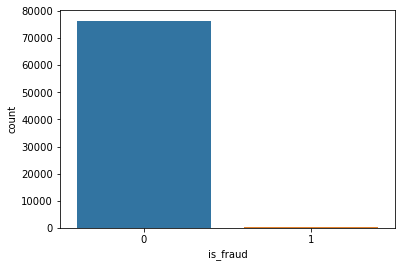

0    76375
1      154
Name: is_fraud, dtype: int64
Percent of is_fraud transactions in total : 0.2 %


In [42]:
# Plot Distribution
sns.countplot(x='is_fraud',data=train)
plt.show()

# What are the counts?
print(train['is_fraud'].value_counts())

# What is the percentage?
count_yes = len(train[train['is_fraud'] == 1])
count_no = len(train[train['is_fraud'] == 0])

percent_success = round((count_yes/(count_yes + count_no))*100, 2)

print('Percent of is_fraud transactions in total :', percent_success, "%")



In [43]:
# only 0.2 percent of transactions are fraud. It is a very imbalanced dataset

# Visualisations

# Device type distribution in total transactions

In [44]:
device_type_counts = train.device_type.value_counts()
device_type_counts = pd.DataFrame(device_type_counts)
device_type_counts

,device_type
other_pcs,45560
android_devices,29662
ios_devices,876
windows_pcs,431


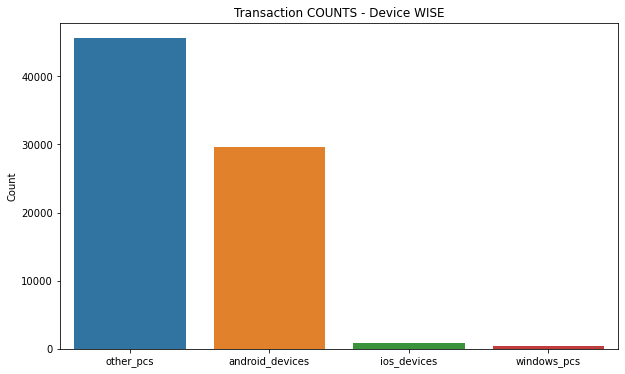

In [45]:
#let see how transactions are distrrbuted with respect to device type
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Transaction COUNTS - Device WISE")

sns.barplot(x = device_type_counts.index,
            y = device_type_counts.device_type)

# Add label for vertical axis
plt.ylabel("Count")


plt.show()

In [46]:
#most of the transactions are made with android and other_pcs devices

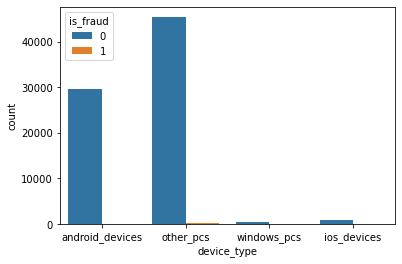

In [47]:
sns.countplot(x="device_type", 
              hue="is_fraud", 
              data=train)
plt.show()

In [48]:
df=train.groupby(['device_type','is_fraud'])['device_type'].count().to_frame().rename(columns={'device_type':'count'}).reset_index()

In [49]:
df

,device_type,is_fraud,count
0,android_devices,0,29657
1,android_devices,1,5
2,ios_devices,0,876
3,ios_devices,1,0
4,other_pcs,0,45415
5,other_pcs,1,145
6,windows_pcs,0,427
7,windows_pcs,1,4


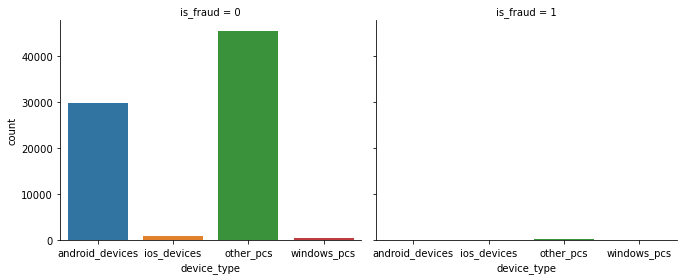

In [50]:
#height=4, aspect=.7
sns.catplot(x="device_type", y="count",col="is_fraud",
                data=df, kind="bar", height=4, aspect=1.2) 

In [51]:
#slightly orange color is visble here so other pcs is what where many of the fraud transactions are present.
#company should focus on this mode of transaction

# Drawing Trends from target variable

In [52]:
train.groupby('is_fraud').mean()

,money_transacted
is_fraud,
0,72.532
1,29984.550


In [53]:
##as we thought the fraud transaction should have high amount
# we can see that mean of the money_transacted if it is a fraud is very high as compared to not fraud

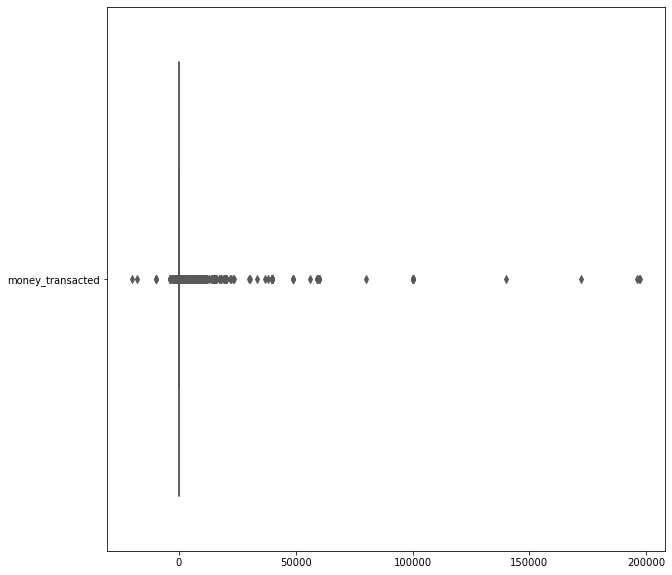

In [54]:
fig, axs = plt.subplots(figsize = (10,10))
sns.boxplot(data=train[numerical_columns],orient='h',palette="Set2")
plt.show()

In [55]:
partner_category_counts = train.partner_category.value_counts(normalize=True)
partner_category_counts = pd.DataFrame(partner_category_counts)
partner_category_counts

,partner_category
cat_1,0.474
cat_2,0.471
cat_3,0.020
cat_4,0.017
cat_5,0.013
cat_7,0.002
cat_6,0.002
cat_8,0.000
cat_9,0.000


In [56]:
#close 94% of the transactions are in cat1 and cat2

<Figure size 1440x576 with 0 Axes>

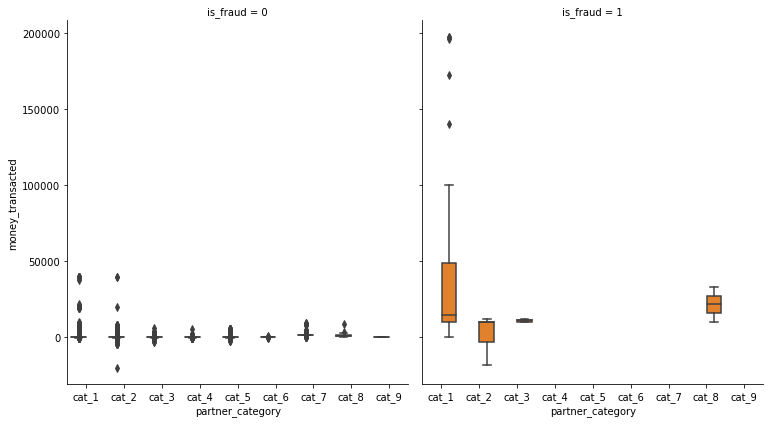

In [57]:
plt.figure(figsize = (20,8))
g = sns.catplot(x="partner_category", y="money_transacted",
                hue="is_fraud",col="is_fraud",
                data=train, kind="box",
                height=6, aspect=.9);

1. interesting to see that, in cat 1 has  fraud money transacted median value is higher than cat2
2. cat8 has only 19 transactions which is very less but we can see some fraudulent transaction cat8.
3. client should focus on partner category of cat1,cat2,cat8

In [58]:
df2=train.groupby(['payment_method','is_fraud'])['payment_method'].count().to_frame().rename(columns={'payment_method':'payment_count'}).reset_index()

In [59]:
df2

,payment_method,is_fraud,payment_count
0,e_wallet_payments,0,27382
1,e_wallet_payments,1,2
2,other_debit_cards,0,4452
3,other_debit_cards,1,43
4,sbi_atm_cum_debit_card,0,30533
5,sbi_atm_cum_debit_card,1,5
6,unified_payments_interface,0,15
7,unified_payments_interface,1,0
8,visa_master_credit_cards,0,2401
9,visa_master_credit_cards,1,53


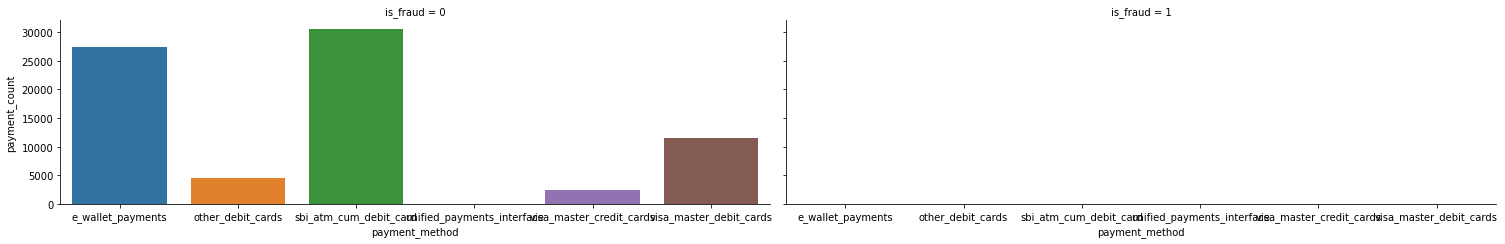

In [60]:
#height=4, aspect=.7
sns.catplot(x="payment_method", y="payment_count",col="is_fraud",
                data=df2, kind="bar", height=3.5, aspect=3.0) 

#target distribution in categorical columns 
fig = plt.figure(figsize=(7,8))
fig.subplots_adjust(wspace=0.5,hspace=1)
cat_columns=list(train.select_dtypes(include=['category','object']).columns)
cat_cols = cat_columns[0:2]
for value in cat_cols:
    if value!= 'is_fraud':
        data_plot=pd.crosstab(train[value],train['is_fraud'])
        #print(data_plot)
        data_plot.plot(kind='bar')
        plt.xticks(rotation=90)
        plt.show()

<Figure size 504x504 with 0 Axes>

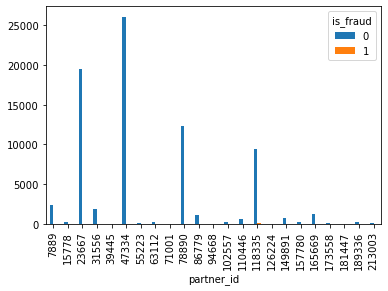

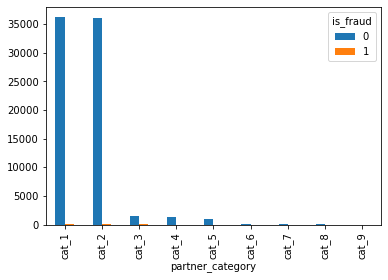

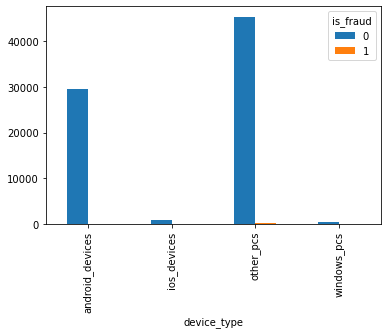

In [62]:
#target distribution in categorical columns 
fig = plt.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.5,hspace=1)

cat_cols2 = cat_columns[2:5]
for value in cat_cols2:
    if value!= 'is_fraud':
        data_plot=pd.crosstab(train[value],train['is_fraud'])
        #print(data_plot)
        data_plot.plot(kind='bar')
        plt.xticks(rotation=90)
        plt.show()

In [ ]:
#target distribution in categorical columns 
fig = plt.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.5,hspace=1)

cat_cols2 = cat_columns[5:]
for value in cat_cols2:
    if value!= 'is_fraud':
        data_plot=pd.crosstab(train[value],train['is_fraud'])
        #print(data_plot)
        data_plot.plot(kind='bar')
        plt.xticks(rotation=90)
        plt.show()

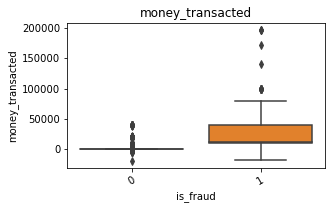

In [63]:
#distribution of numerical variables with respect to target.
fig=plt.figure(figsize=(12,24))
fig.subplots_adjust(wspace=0.6,hspace=1)
num_columns=train.select_dtypes(exclude=['category','object']).columns

for i,value in enumerate(num_columns):
    plt.subplot(5,2,i+1)
    plt.xticks(rotation=30)
    plt.title(value)
    sns.boxplot(x='is_fraud',y=value,data=train)
plt.show()

In [ ]:
#as fraud transactions are happened in high value amount,may be the client can add another mode of security to ensure 
#if it is not fraud transaction

# Dividing data into training and validation subsets 

In [64]:
#Seperate Independent and Dependent attributes.
y = train['is_fraud']
X = train.drop(['is_fraud'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,stratify = y,random_state=0)

In [65]:
y_train.head()

8008     0
74173    0
53932    0
64979    0
50440    0
Name: is_fraud, dtype: category
Categories (2, int64): [0, 1]

In [66]:
#let us see the dimensions after splitting
print('X_train dimensions: ', X_train.shape)
print('y_train dimensions: ', y_train.shape)
print('X_test dimensions:  ', X_test.shape)
print('y_test dimensions:  ', y_test.shape)

X_train dimensions:  (53570, 11)
y_train dimensions:  (53570,)
X_test dimensions:   (22959, 11)
y_test dimensions:   (22959,)


In [67]:
#checking target distribution in train and validation sets
fn_target_dist(y_train)

,count,count%
0,53462,99.800
1,108,0.200


In [ ]:
fn_target_dist(y_test)

In [68]:
#initializing a dataframe to store the metrics from classification different models
metrics = pd.DataFrame(columns=['model','Accuracy','precision_1class','precision_0class',
                                'recall_1class','recall_0class','f1score_1class','f1score_0class','AUC_value'])

In [69]:
# Function to generate classification metrics,AUC value of model and stores in metrics
def fn_compute_metrics(model,modelname, 
                       data, 
                       actuals):
    global metrics
    predictions = model.predict(data)
    print('\nConfusion Matrix :')
    print(confusion_matrix(actuals, predictions) ) 
    cf = confusion_matrix(actuals, predictions)
    
   
    Accuracy = accuracy_score(actuals,predictions)
    precision_0class = precision_score(actuals,predictions,average = None)[0]
    precision_1class = precision_score(actuals,predictions,average = None)[1]
    
    recall_0class = recall_score(actuals,predictions,average = None)[0]
    recall_1class = recall_score(actuals,predictions,average = None)[1]
    
    f1score_0class = f1_score(actuals,predictions,average = None)[0]
    f1score_1class = f1_score(actuals,predictions,average = None)[1]
    
    lb = LabelBinarizer()
    actuals = lb.fit_transform(actuals)
    y_scores = []
    y_scores = model.predict_proba(data)[:, 1]

    fpr, tpr, auc_thresholds = roc_curve(actuals, y_scores)
    AUC_value = roc_auc_score(actuals, y_scores)
    
    metrics = metrics.append({'precision_1class':precision_1class,
                            'precision_0class':precision_0class, 
                            'recall_1class':recall_1class, 
                            'recall_0class':recall_0class,
                            'f1score_0class':f1score_0class,
                            'f1score_1class':f1score_1class,
                            'Accuracy':Accuracy,
                            'model':modelname,
                            'AUC_value':AUC_value}, ignore_index=True)
     
    print('\nReport : ')
    print(classification_report(actuals, predictions))
    print('\nAccuracy Score :', Accuracy)
    print('\nAUC Score :',AUC_value)
    
    return ''

# logistic Regression Classifier

In [70]:
%%time
clf_logreg = Pipeline(steps=[('Preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=500))])


clf_logreg.fit(X_train, y_train)

print("\nTRAIN METRICS FOR THE LOGIISTIC MODEL")
print(fn_compute_metrics(clf_logreg,'logistic_train', X_train, y_train))
print("*****"*11)
print("\nTEST METRICS FOR THE LOGISTIC MODEL")
print(fn_compute_metrics(clf_logreg,'logistic_test', X_test, y_test))


TRAIN METRICS FOR THE LOGIISTIC MODEL

Confusion Matrix :
[[53447    15]
 [   59    49]]

Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53462
           1       0.77      0.45      0.57       108

    accuracy                           1.00     53570
   macro avg       0.88      0.73      0.78     53570
weighted avg       1.00      1.00      1.00     53570


Accuracy Score : 0.9986186298301288

AUC Score : 0.9962447366561504

*******************************************************

TEST METRICS FOR THE LOGISTIC MODEL

Confusion Matrix :
[[22909     4]
 [   28    18]]

Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22913
           1       0.82      0.39      0.53        46

    accuracy                           1.00     22959
   macro avg       0.91      0.70      0.76     22959
weighted avg       1.00      1.00      1.00     22959


Accuracy Score : 0.

In [71]:
metrics

,model,Accuracy,precision_1class,precision_0class,recall_1class,recall_0class,f1score_1class,f1score_0class,AUC_value
0,logistic_train,0.999,0.766,0.999,0.454,1.000,0.570,0.999,0.996
1,logistic_test,0.999,0.818,0.999,0.391,1.000,0.529,0.999,0.983


# KNN Model1

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 3,
                                 metric = "euclidean")

In [ ]:
# Bundle preprocessing and modeling code in a pipeline
knn_pipeline1 = Pipeline(steps=[('Preprocessor', preprocessor),
                               ('model', knn_model)
                             ])

# Preprocessing of training data, fit model 
knn_pipeline1.fit(X_train, y_train)

In [ ]:
print("\nTRAIN METRICS FOR THE KNN MODEL")
print(fn_compute_metrics(knn_pipeline1,'knn1_train', X_train, y_train))
print("*****"*11)
print("\nTEST METRICS FOR THE KNN MODEL")
print(fn_compute_metrics(knn_pipeline1,'knn1_test', X_test, y_test))

In [ ]:
metrics

# Decision Tree model1

In [ ]:
%%time
clf_dt = Pipeline(steps=[('Preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

dt_param_grid = {'classifier__criterion': ['entropy'], 'classifier__max_depth': [8], 'classifier__min_samples_leaf': [10],
                 'classifier__min_samples_split': [20],"classifier__class_weight":['balanced']}

dt_grid = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5,verbose=3)

dt_grid.fit(X_train,y_train)

In [ ]:
#using compute func it predicts with the model and compares it with actual y train then gives the confusion matrix
print("\nTRAIN METRICS FOR THE DT MODEL")
print(fn_compute_metrics(dt_grid,'dt_model1_train',X_train, y_train))
print("*****"*11)
print("\nTEST METRICS FOR THE DT MODEL")
print(fn_compute_metrics(dt_grid,'dt_model1_test',X_test, y_test))

In [ ]:
dt_best1 = dt_grid.best_estimator_

In [ ]:
metrics

# KNN2 model2

In [74]:

from sklearn.neighbors import KNeighborsClassifier

knn_model2 = KNeighborsClassifier(n_neighbors = 5,
                                 metric = "euclidean")

In [75]:
# Bundle preprocessing and modeling code in a pipeline
knn_pipeline2 = Pipeline(steps=[('Preprocessor', preprocessor),
                               ('model', knn_model2)
                             ])

# Preprocessing of training data, fit model 
knn_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num_trf',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  ['money_transacted']),
                                                 ('cat_trf',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_onehotencode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                

In [76]:
print("\nTRAIN METRICS FOR THE KNN MODEL")
print(fn_compute_metrics(knn_pipeline2,'knn2_train', X_train, y_train))
print("*****"*11)
print("\nTEST METRICS FOR THE KNN MODEL")
print(fn_compute_metrics(knn_pipeline2,'knn2_test', X_test, y_test))


TRAIN METRICS FOR THE KNN MODEL

Confusion Matrix :
[[53457     5]
 [   16    92]]

Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53462
           1       0.95      0.85      0.90       108

    accuracy                           1.00     53570
   macro avg       0.97      0.93      0.95     53570
weighted avg       1.00      1.00      1.00     53570


Accuracy Score : 0.9996079895463879

AUC Score : 0.9999449245362231

*******************************************************

TEST METRICS FOR THE KNN MODEL

Confusion Matrix :
[[22908     5]
 [   16    30]]

Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22913
           1       0.86      0.65      0.74        46

    accuracy                           1.00     22959
   macro avg       0.93      0.83      0.87     22959
weighted avg       1.00      1.00      1.00     22959


Accuracy Score : 0.99908532601

In [77]:
metrics

,model,Accuracy,precision_1class,precision_0class,recall_1class,recall_0class,f1score_1class,f1score_0class,AUC_value
0,logistic_train,0.999,0.766,0.999,0.454,1.000,0.570,0.999,0.996
1,logistic_test,0.999,0.818,0.999,0.391,1.000,0.529,0.999,0.983
2,xgb_pipeline_train,1.000,0.964,1.000,0.991,1.000,0.977,1.000,1.000
3,xgb_pipeline_test,1.000,0.955,1.000,0.913,1.000,0.933,1.000,1.000
4,knn2_train,1.000,0.948,1.000,0.852,1.000,0.898,1.000,1.000
5,knn2_test,0.999,0.857,0.999,0.652,1.000,0.741,1.000,1.000


# XGBoost Classifier1

In [72]:
%%time


xgb_model = XGBClassifier(n_estimators = 1000,
                          learning_rate = 0.05,
                          early_stopping_rounds=5,
                          n_jobs = 4,
                          random_state = 2,
                          verbosity = 0)



# Bundle preprocessing and modeling code in a pipeline
xgb_pipeline = Pipeline(steps=[('Preprocessor', preprocessor),
                              ('model', xgb_model)
                             ])

# Preprocessing of training data, fit model 
xgb_pipeline.fit(X_train, y_train)

print("\nTRAIN METRICS FOR THE BASE MODEL")
print(fn_compute_metrics(xgb_pipeline,'xgb_pipeline_train',X_train, y_train))
print("*****"*11)
print("\nTEST METRICS FOR THE BASE MODEL")
print(fn_compute_metrics(xgb_pipeline,'xgb_pipeline_test',X_test, y_test))



TRAIN METRICS FOR THE BASE MODEL

Confusion Matrix :
[[53458     4]
 [    1   107]]

Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53462
           1       0.96      0.99      0.98       108

    accuracy                           1.00     53570
   macro avg       0.98      1.00      0.99     53570
weighted avg       1.00      1.00      1.00     53570


Accuracy Score : 0.9999066641777115

AUC Score : 0.999998874243665

*******************************************************

TEST METRICS FOR THE BASE MODEL

Confusion Matrix :
[[22911     2]
 [    4    42]]

Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22913
           1       0.95      0.91      0.93        46

    accuracy                           1.00     22959
   macro avg       0.98      0.96      0.97     22959
weighted avg       1.00      1.00      1.00     22959


Accuracy Score : 0.9997386645

In [73]:
metrics

,model,Accuracy,precision_1class,precision_0class,recall_1class,recall_0class,f1score_1class,f1score_0class,AUC_value
0,logistic_train,0.999,0.766,0.999,0.454,1.000,0.570,0.999,0.996
1,logistic_test,0.999,0.818,0.999,0.391,1.000,0.529,0.999,0.983
2,xgb_pipeline_train,1.000,0.964,1.000,0.991,1.000,0.977,1.000,1.000
3,xgb_pipeline_test,1.000,0.955,1.000,0.913,1.000,0.933,1.000,1.000


# XGB GRID custom error function

In [ ]:
%%time

xgb_customerror = XGBClassifier(learning_rate = 0.05,
                                early_stopping_rounds=5,
                                  n_jobs = 4,
                                  random_state = 2,
                                  verbosity = 0)
# Bundle preprocessing and modeling code in a pipeline
xgb_customerror = Pipeline(steps=[('Preprocessor', preprocessor),
                              ('model', xgb_customerror)
                             ])

param_grid = {"model__n_estimators": [500,1000]}

searchCV = GridSearchCV(xgb_customerror, 
                        cv=5, 
                        param_grid=param_grid,scoring = make_scorer(f1_score) )

searchCV.fit(X_train, y_train)    


print("\nTRAIN METRICS FOR THE XGB GRID custom error function")
print(fn_compute_metrics(searchCV,'xgb_customerror',X_train, y_train))
print("*****"*11)
print("\nTEST METRICS FOR THE XGB GRID custom error function")
print(fn_compute_metrics(searchCV,'xgb_customerrort',X_test, y_test))

In [ ]:
xgbbest2 = searchCV.best_estimator_
xgbbest2

# XGB model3 

In [ ]:
%%time

xgb_model3 = XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=500, verbosity=1, silent=None, 
                       objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, 
                       gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, 
                       colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, 
                           scale_pos_weight=1)


# Bundle preprocessing and modeling code in a pipeline
xgb_pipeline3 = Pipeline(steps=[('Preprocessor', preprocessor),
                              ('model', xgb_model3)
                             ])
xgb_pipeline3.fit(X_train, y_train)  

print("\nTRAIN METRICS FOR THE BASE MODEL")
print(fn_compute_metrics(xgb_pipeline3,'xgb_pipeline4_train',X_train, y_train))
print("*****"*11)
print("\nTEST METRICS FOR THE BASE MODEL")
print(fn_compute_metrics(xgb_pipeline3,'xgb_pipeline4_test',X_test, y_test))

In [ ]:
metrics

Decision Tree model2-grid1

In [ ]:
%%time
clf_dt = Pipeline(steps=[('Preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

dt_param_grid = {'classifier__max_depth' : range(1,8), 
              'classifier__min_impurity_decrease' : [0.01,0.05],
              'classifier__min_samples_split':[3,5,7],
              'classifier__criterion':['entropy']
             }

dt_grid1 = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5,verbose=3)

dt_grid1.fit(X_train,y_train)

print("\nTRAIN METRICS FOR THE DT GRID MODEL")
print(fn_compute_metrics(dt_grid1,'dt_grid1_train',X_train, y_train))
print("*****"*11)
print("\nTEST METRICS FOR THE DT GRID MODEL")
print(fn_compute_metrics(dt_grid1,'dt_grid1_test',X_test, y_test))

In [ ]:
dt_best2 = dt_grid1.best_estimator_
dt_best2

# XGBoost Classifier Grid2

In [ ]:
%%time

xgb_model2 = XGBClassifier(early_stopping_rounds=5,
                          n_jobs = 4,
                          random_state = 2,
                          verbosity = 0)


# Bundle preprocessing and modeling code in a pipeline
xgb_pipeline2 = Pipeline(steps=[('Preprocessor', preprocessor),
                              ('model', xgb_model2)
                             ])
param_grid = {
    "model__n_estimators": [10, 50, 100, 500],
    "model__learning_rate": [0.05, 0.1, 0.5, 1],
}


searchCV = GridSearchCV(xgb_pipeline2, 
                        cv=5, 
                        param_grid=param_grid)

searchCV.fit(X_train, y_train)  


print("\nTRAIN METRICS FOR THE BASE MODEL")
print(fn_compute_metrics(searchCV,'xgb_pipeline2_train',X_train, y_train))
print("*****"*11)
print("\nTEST METRICS FOR THE BASE MODEL")
print(fn_compute_metrics(searchCV,'xgb_pipeline2_test',X_test, y_test))

In [ ]:
xgb_best3 = searchCV.best_estimator_
xgb_best3

In [ ]:
metrics

# Random Forest Classifier Grid1

In [ ]:
%%time

clf = Pipeline(steps=[('Preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_jobs = -1))])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

param_grid = {"classifier__n_estimators" : [150,300,500],
              "classifier__max_depth" : [8,10],
              "classifier__max_features" : [5, 7],
              "classifier__min_samples_leaf" : [4, 6],
             "classifier__class_weight":["balanced"]}



rf_grid = GridSearchCV(clf, param_grid=param_grid, cv=kfold,verbose=2)


rf_grid.fit(X_train,y_train)

rf_grid.best_params_

In [ ]:
rf_grid_best = rf_grid.best_estimator_

In [ ]:
print("\nTRAIN METRICS FOR THE BASE MODEL")
print(fn_compute_metrics(rf_grid,'rf_grid_train',X_train, y_train))
print("*****"*11)
print("\nTEST METRICS FOR THE BASE MODEL")
print(fn_compute_metrics(rf_grid,'rf_grid_test',X_test, y_test))

In [ ]:
metrics

# Final Model for submission2 by merging data back

In [ ]:
X_train_all = pd.concat([X_train, X_test])
y_train_all = pd.concat([y_train, y_test])

print(X_train_all.shape, y_train_all.shape)

In [ ]:
%%time


xgb_model = XGBClassifier(n_estimators = 1000,
                          learning_rate = 0.05,
                          early_stopping_rounds=5,
                          n_jobs = 4,
                          random_state = 2,
                          verbosity = 0)



# Bundle preprocessing and modeling code in a pipeline
xgb_pipeline = Pipeline(steps=[('Preprocessor', preprocessor),
                              ('model', xgb_model)
                             ])

# Preprocessing of training data, fit model 
xgb_pipeline.fit(X_train, y_train)

print("\nTRAIN METRICS FOR THE BASE MODEL")
print(fn_compute_metrics(xgb_pipeline,'xgb_pipeline_train',X_train_all, y_train_all))

In [ ]:
# Test Submission2

# Test dataset preparation

In [ ]:
test.head()

In [ ]:
# let us see if there are any Nulls in test data.
test_nulls = fn_nulls_count(test)
test_nulls

In [ ]:
#let us convert columns which are needed to be categorical as categorical
print(columns_to_convert)

In [ ]:
columns_to_change = columns_to_convert.copy()
columns_to_change.remove('is_fraud')
test[columns_to_change] = test[columns_to_change].astype('category')

In [ ]:
#  creating categorical columns list
test_categorical_columns = test.select_dtypes(include =['object','category']).columns.tolist()

In [ ]:
test.dtypes

In [ ]:
train.dtypes

In [ ]:
#checking for columns which are in x train but not in test
unique_cols_in_X_train = list(set(X_train.columns)-set(test.columns))

#checking for columns which are in test but not in x train
unique_cols_in_test =  list(set(test.columns)-set(X_train.columns))

print(unique_cols_in_X_train)
print(unique_cols_in_test)


In [ ]:
test_pred2 = xgb_pipeline.predict(test)
test_pred2

In [ ]:
submissions_df = pd.DataFrame({'transaction_number': transaction_number_test, 'is_fraud': test_pred2})
submissions_df.to_csv("C:\\Users\\shashidhar\\Desktop\\INSOFE\\7402c\\mith shashidhar\\submissions2.csv",index=False)
submissions_df.tail()

# Voting Classifier

In [ ]:
#using voting classifier to combine the predictions from different models .
#'soft' vote predicts the class label based on the argmax of the sums of the predicted probabilities.
#‘hard’, uses predicted class labels for majority rule voting.

#giving the best estimator from diff models as input

votingC = VotingClassifier(estimators=[('knn_pipeline1',knn_pipeline1),
('xgb_best3', xgb_best3 ), ('xgb_pipeline3',xgb_pipeline3),('xgb_pipeline',xgb_pipeline),("xgbbest2",xgbbest2)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)

In [ ]:
#using compute func it predicts with the model and compares it with actual y train then gives the confusion matrix

print("\nTRAIN METRICS FOR THE BASE MODEL")
print(fn_compute_metrics(votingC,'Votingc', X_train, y_train))

print("*****"*11)

print("\nTEST METRICS FOR THE BASE MODEL")
print(fn_compute_metrics(votingC,'Votingc', X_test, y_test))

In [ ]:
metrics

In [ ]:
#getting final model with 
votingC1 = VotingClassifier(estimators=[('dt_best2',dt_best2), ('knn_pipeline1',knn_pipeline1),
('xgb_best3', xgb_best3 ), ('xgb_pipeline3',xgb_pipeline3),('xgb_pipeline',xgb_pipeline),("xgbbest2",xgbbest2)], voting='soft', n_jobs=4)


Final_modelc = votingC1.fit(X_train_all,y_train_all)

In [ ]:
print("\nTRAIN METRICS FOR THE BASE MODEL")
print(fn_compute_metrics(Final_modelc,'Final model_Votingc', X_train_all, y_train_all))

In [ ]:
test_pred3 = Final_modelc.predict(test)
test_pred3

In [ ]:
submissions_df = pd.DataFrame({'transaction_number': transaction_number_test, 'is_fraud': test_pred3})
submissions_df.to_csv("C:\\Users\\shashidhar\\Desktop\\INSOFE\\7402c\\mith shashidhar\\submissions3.csv",index=False)
submissions_df.tail()

In [ ]:
%%time
#submission4,final model,previous did some mistake of not fitting with all data

xgb_model = XGBClassifier(n_estimators = 1000,
                          learning_rate = 0.05,
                          early_stopping_rounds=5,
                          n_jobs = 4,
                          random_state = 2,
                          verbosity = 0)



# Bundle preprocessing and modeling code in a pipeline
xgb_pipeline = Pipeline(steps=[('Preprocessor', preprocessor),
                              ('model', xgb_model)
                             ])

# Preprocessing of training data, fit model 
xgb_pipeline.fit(X_train_all, y_train_all)

print("\nTRAIN METRICS FOR THE BASE MODEL")
print(fn_compute_metrics(xgb_pipeline,'xgb_pipeline_train',X_train_all, y_train_all))

In [ ]:
test_pred4 = Final_modelc.predict(test)
test_pred4

In [ ]:
submissions_df = pd.DataFrame({'transaction_number': transaction_number_test, 'is_fraud': test_pred4})
submissions_df.to_csv("C:\\Users\\shashidhar\\Desktop\\INSOFE\\7402c\\mith shashidhar\\submissions4.csv",index=False)
submissions_df.tail()

# Features Importance

In [ ]:
#pl = rf_grid.best_estimator_.named_steps['preprocessor']
#catpl = pl.named_transformers_['cat']
#ohe = catpl.named_steps['onehot']
#ohe_features = ohe.get_feature_names()
#print(ohe_features)

pl = xgb_best3.named_steps['Preprocessor']
catpl = pl.named_transformers_['cat_trf']
ohe = catpl.named_steps['cat_onehotencode']
ohe_features = ohe.get_feature_names()
print(ohe_features)

In [ ]:
len(ohe_features)

In [ ]:
print(numerical_columns)
numcols = numerical_columns.copy()
numcols.extend(ohe_features)

In [ ]:
len(numcols)

In [ ]:
#feature_imp = rf_grid.best_estimator_.steps[1][1].feature_importances_
feature_imp = xgb_pipeline3.steps[1][1].feature_importances_
print(feature_imp)

In [ ]:
feature_imp_df = pd.DataFrame(feature_imp.tolist(),index =numcols,columns=['var_imp'])
feature_imp_df = feature_imp_df.sort_values(by="var_imp",ascending=False)
feature_imp_df.head(8)

In [ ]:
feature_imp_df[:15].plot(kind='bar')

In [ ]:
#interestingly,X7-24,X7-1 is having high importance,24th day and 1st in a month is having more importance in the month
#so there should be more fraud transactions on those days
#creditcard has more feature importance. so there should be many fraud transactions (minority class) 
#client should impose more security on credicard high value transactions
# x7-1, 1st day of the month 
#x6-1 and x6-2, 1st and 2nd month of the year has many fraud transactions
#x1-78890, partner id has more important, client look should see into this partner transactions.

In [ ]:
list1 = [xgbbest2,rf_grid_best]
modelnames = ['xgbbest2',"rf_grid_best"]

In [ ]:
#function to plot roc curves
#Higher the area under the curve(greater auc is better) better is the model,choose model based on higher auc value
def plot_roc_curve(model_list,data,actuals,modelnames):
        plt.figure(figsize=(8,8))
        plt.title('ROC Curve')
        plt.axis([-0.005, 1, 0, 1.005])
        plt.xticks(np.arange(0,1, 0.05), rotation=90)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate (Recall)")
        
        for i in (0,(len(model_list)-1)):
            model = model_list[i]
            lb = LabelBinarizer()

            actuals = lb.fit_transform(actuals)
            
            y_scores = []
            y_scores = model.predict_proba(data)[:, 1]
            AUC_value = roc_auc_score(actuals, y_scores)

            modelname = modelnames[i]
            fpr, tpr, auc_thresholds = roc_curve(actuals, y_scores)
            print('\n', modelname, 'AUC Score :',round(AUC_value,3)) # AUC of ROC
           
            label1 = modelnames[i]
            plt.plot(fpr, tpr, linewidth=2,label = label1)
            plt.legend(loc='best')
            plt.plot([0, 1], [0, 1], 'k--')   

In [ ]:
 plot_roc_curve(list1,X_test, y_test,modelnames)

In [ ]:
# Xgb best2 is little higher in AUc value as compared to random forest model
#checking models for models selection
#xgbm is handling this problem well to find the better f1 score as compared to random forest

summary:
  1. Extracted some features of days,month,year from transaction_initiation column.
  2. logistic regression is plotted to see how the linear model is performing then 
  3. Initial model with KNN with k=3 neighbours
  4. second model with decision tree model ,it didnot perform well as compared to 
  5. third model with with kNN with k=5,drop in values of f1 score as compared k with 3
  6. next model with Xgbm did very good and tried iterating with grid and also tried to change metric to f1score using      makescorer but there was no significant in f1 score
  7. Tried with voting C which did same as compared to xgbm.

#some Insights from plots and recommendation to client
1. high value transactions are having more fraud ,certainly he should look into them and pose more security while those transactions are happening like asking for some more personal details or finger print authorization or calling the customer to make sure if this is him who is making the transaction and keep hold of it until the customer confirms.
2. interesting to see that, in cat 1 the fraud money transacted value median is higher than cat2
3. cat8 has only 19 transactions which is very less but we can see some fraudulent transaction cat8.
4. client should focus on partner category of cat1,cat2,cat8
5. slightly orange color is visble there in other pcs.so other pcs is what where many of the fraud transactions are present.
    company should focus on this mode of transaction as well
6. interestingly,X7-24,X7-1 is having high importance,24th day and 1st day in a month is having more importance in the month
    so there should be more fraud transactions on those days
7. creditcard has more feature importance. so there should be many fraud transactions (minority class) 
    #client should impose more security on credicard high value transactions
8. x6-1 and x6-2 has more importance we can say 1st and 2nd month of the year has many fraud transactions
9. x1-78890, partner id has more important, client look should see into this partner transactions.

In [ ]:
#final metrics of diff models
metrics